In [1]:
#refernce to data_preprocessing notebook to use the get_data function
%run data_preprocessing.ipynb

In [2]:
#imports
import os
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [3]:
# for get_data function
enable_feature_engineering = True
enable_outlier_handling = True
normalize = 'minmax'
use_one_hot_encoding = True
split_size = (0.9, 0.0, 0.1)

In [4]:
#apply get_data function
y_train, x_train, y_val, x_val, y_test, x_test = get_data(enable_feature_engineering, enable_outlier_handling, normalize, use_one_hot_encoding, split_size)

In [5]:
#train the model
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

GaussianNB()

In [6]:
# encode the target variable into a numeric value
label_encoder = preprocessing.LabelEncoder()
y_test = label_encoder.fit_transform(y_test)

In [7]:
#apply the model (predict)
x_test_prediction = naive_bayes.predict(x_test)

In [8]:
#taken from the exercise script
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    #plt.show()

Accuracy:0.6771182732973604


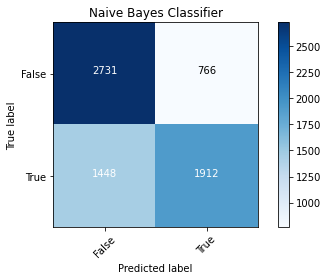

In [9]:
#compute the confusion matrix
cnf_matrix = confusion_matrix(y_test, x_test_prediction)

#compute accuracy score
accuracy = accuracy_score(y_test, x_test_prediction)
print("Accuracy:{}".format(accuracy))

#plot the confusion matrix
plot_confusion_matrix(cnf_matrix, classes=label_encoder.classes_, title='Naive Bayes Classifier')

In [10]:
#calculate error-rate
error_rate = 1-accuracy
print("Error-Rate:{}".format(error_rate))

Error-Rate:0.3228817267026396


In [11]:
#calculate precision
precision = cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[0,1])
print("Precision:{}".format(precision))

Precision:0.713965646004481


In [12]:
#calculate recall
recall = cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0])
print("Recall:{}".format(recall))

Recall:0.569047619047619


In [13]:
#calculate f1-score
f1_score = (2*precision*recall)/(precision+recall)
print("F1-Score:{}".format(f1_score))

F1-Score:0.6333222921497185


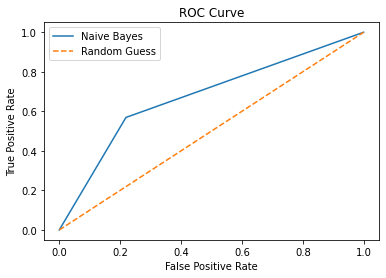

In [14]:
# generate a random guess prediction 
random_guess = [0 for _ in range(len(y_test))]

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, x_test_prediction)
rg_fpr, rg_tpr, rg_threshold = roc_curve(y_test, random_guess)

#plot the curves
plt.plot(fpr,tpr,label='Naive Bayes')
plt.plot(rg_fpr,rg_tpr,linestyle='--', label='Random Guess')

#show axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#show title
plt.title('ROC Curve')

#show legend
plt.legend()

# show the plot
plt.show()

In [15]:
#area under the roc curve
auc = roc_auc_score(y_test, x_test_prediction)
rg_auc = roc_auc_score(y_test, random_guess)

print('Naive Bayes: ROC AUC=%.4f' % (auc))
print('Random Guess: ROC AUC=%.4f' % (rg_auc))

Naive Bayes: ROC AUC=0.6750
Random Guess: ROC AUC=0.5000
